In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
# Displaying the info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display missing values
missing_values


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
# Preprocessing the data
from sklearn.preprocessing import StandardScaler

# Check for missing values
df.isnull().sum()

# Since there are no missing values, we proceed to outlier detection and removal

# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each column except 'ID#' and 'Award?'
columns_to_check = df.columns.difference(['ID#', 'Award?'])
for column in columns_to_check:
    df = remove_outliers(df, column)

# Scale the features
scaler = StandardScaler()
df[columns_to_check] = scaler.fit_transform(df[columns_to_check])

# Display the first few rows of the preprocessed dataframe
display(df.head())

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,-0.371301,0.0,-0.692374,0.0,0.0,-0.765878,-1.050138,0.0,0.0,1.506923,0
1,2,-0.589938,0.0,-0.692374,0.0,0.0,-0.762583,-0.915131,0.0,0.0,1.491411,0
2,3,-0.046724,0.0,-0.692374,0.0,0.0,-0.448572,-0.645116,0.0,0.0,1.523404,0
3,4,-0.699711,0.0,-0.692374,0.0,0.0,-0.739683,-1.050138,0.0,0.0,1.483655,0
5,6,-0.659320,0.0,-0.692374,0.0,0.0,-0.779859,-1.185145,0.0,0.0,1.478807,0


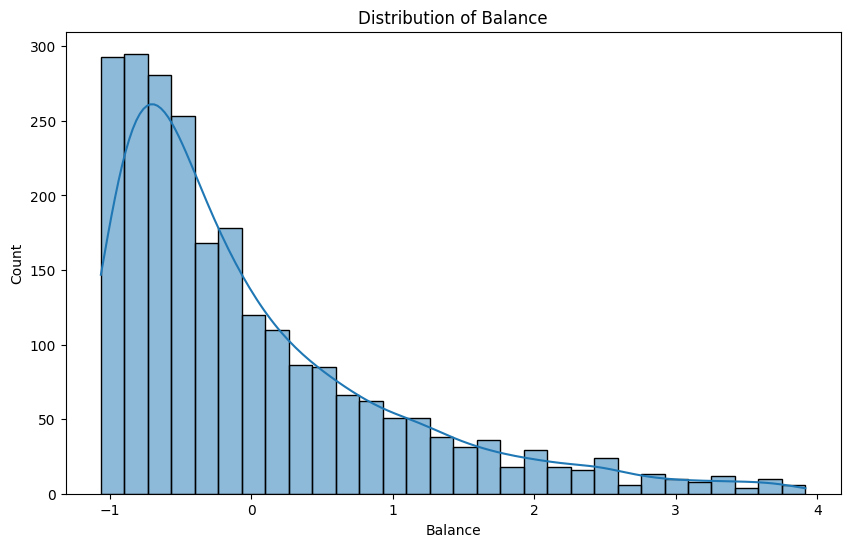

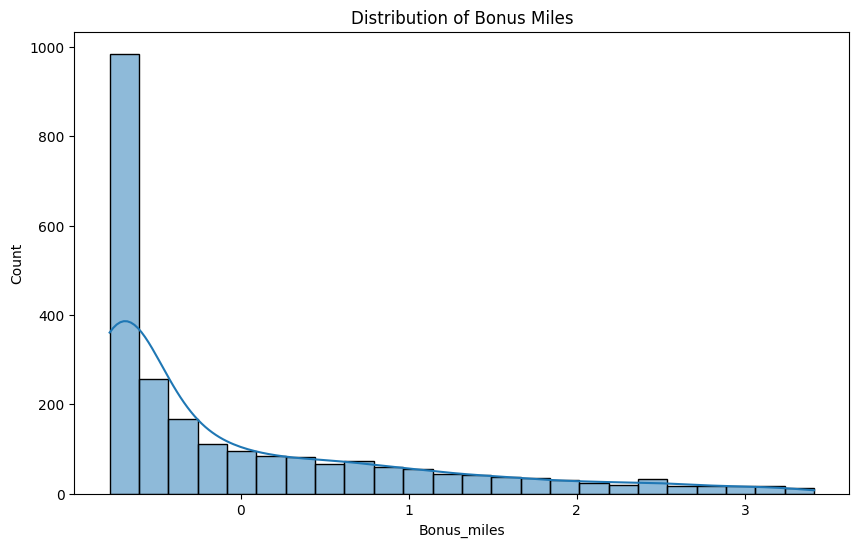

<Figure size 1200x1000 with 0 Axes>

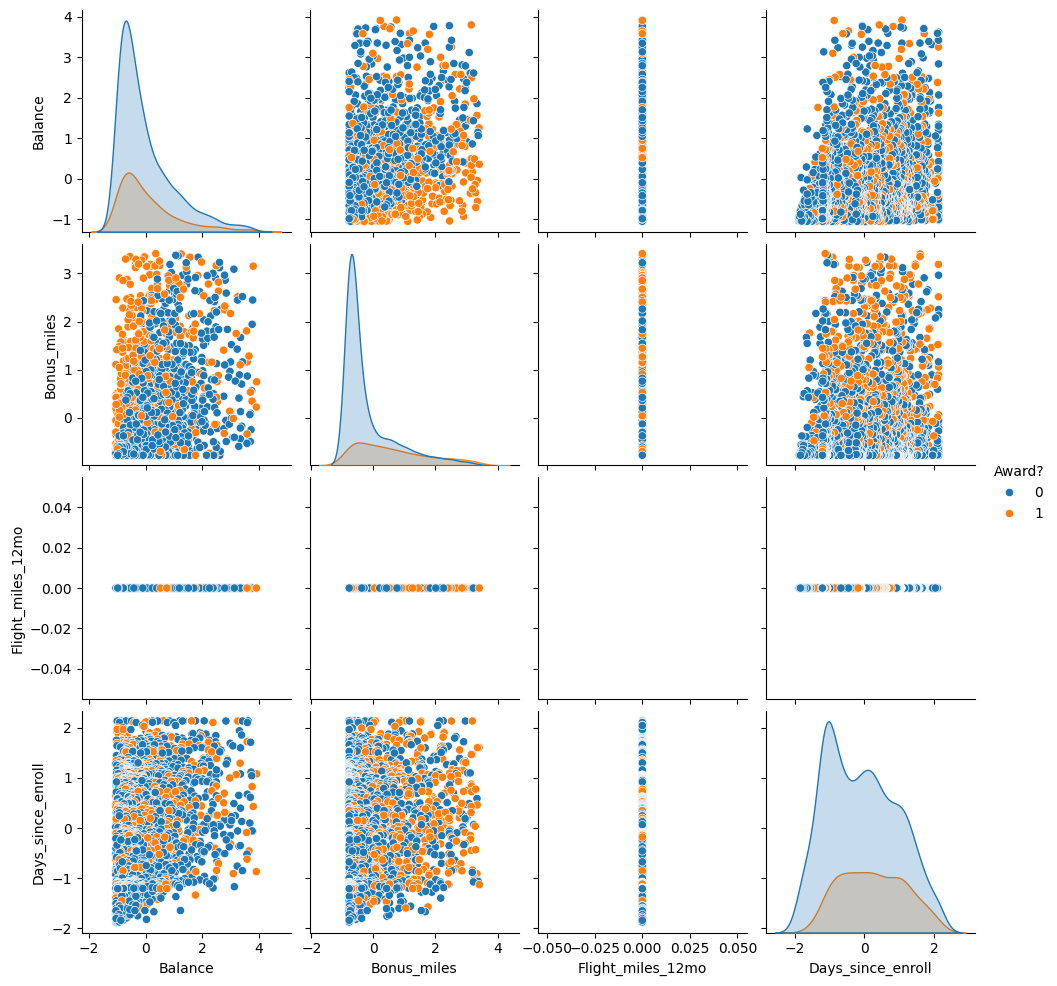

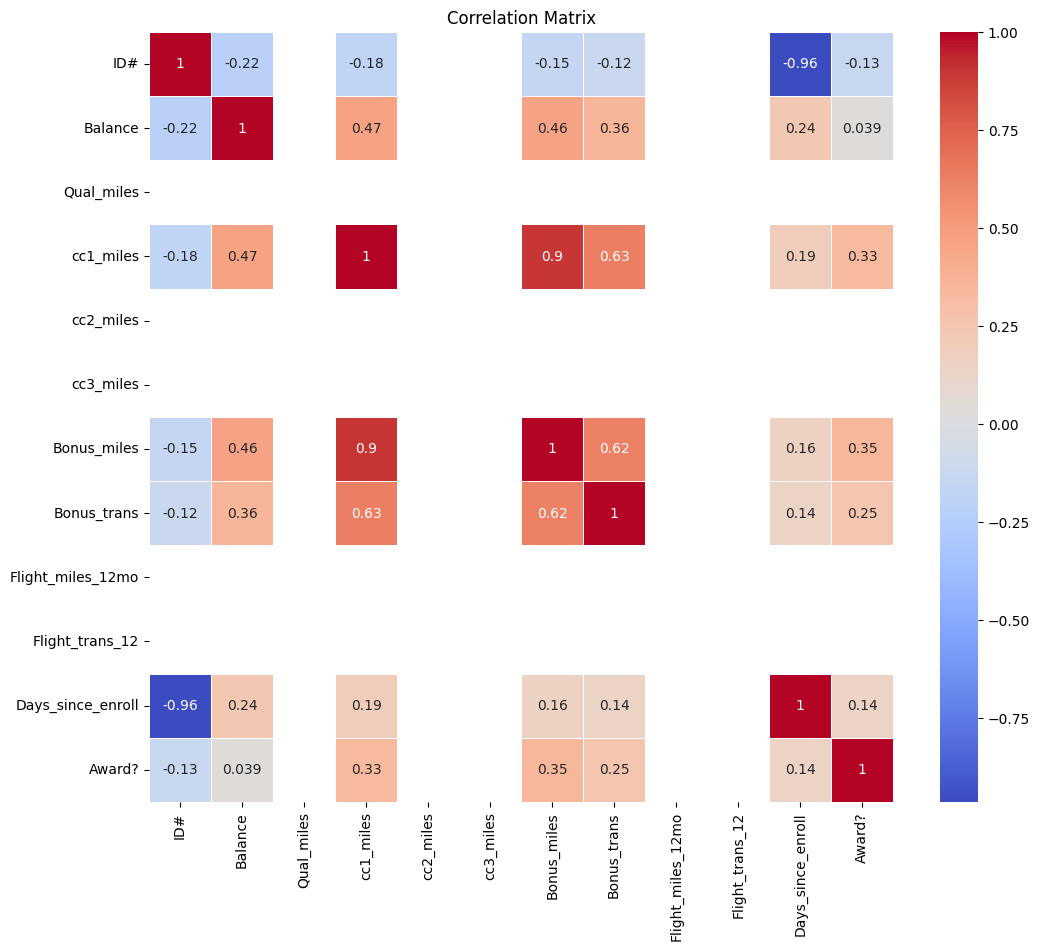

In [6]:
# Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Balance' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], kde=True)
plt.title('Distribution of Balance')
plt.show()

# Plot the distribution of the 'Bonus_miles' feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Bonus_miles'], kde=True)
plt.title('Distribution of Bonus Miles')
plt.show()

# Plot the pairplot to see the relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll', 'Award?']], hue='Award?')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

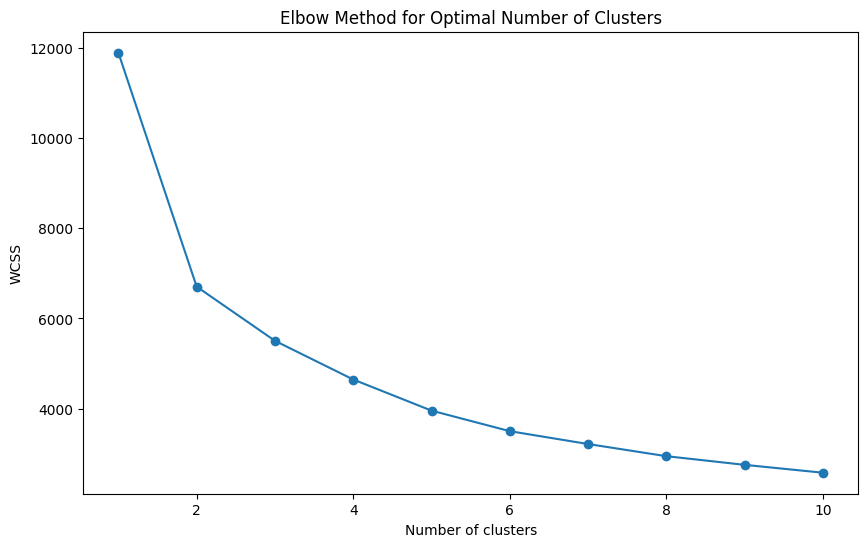

In [7]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[columns_to_check])
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Preprocess the data
from sklearn.cluster import DBSCAN, AgglomerativeClustering



columns_to_check = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
scaler = StandardScaler()
df[columns_to_check] = scaler.fit_transform(df[columns_to_check])

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df[columns_to_check])

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df[columns_to_check])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[columns_to_check])


K-Means Clusters:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hierarchical_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,,
0,1141.786062,-0.435637,0.0,-0.655229,0.0,0.0,-0.602863,-0.601135,0.0,0.0,0.840086,0.175041,2.995138,0.014587
1,1668.066434,0.871574,0.0,1.977713,0.0,0.0,2.168500,1.046722,0.0,0.0,0.428329,0.513986,2.454545,0.419580
2,1414.211618,1.893365,0.0,0.410758,0.0,0.0,0.243139,0.529054,0.0,0.0,0.635795,0.219917,0.858921,-0.107884
3,3203.665775,-0.497280,0.0,-0.678893,0.0,0.0,-0.621571,-0.718576,0.0,0.0,-0.933227,0.116310,2.316845,0.006684
4,2368.893004,-0.133370,0.0,0.509197,0.0,0.0,0.325338,0.990804,0.0,0.0,-0.197548,0.401235,0.306584,0.578189


Hierarchical Clusters:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,
0,1920.416118,-0.091242,0.0,0.426411,0.0,0.0,0.204572,0.879710,0.0,0.0,0.174840,0.370066,2.947368,0.572368
1,1455.526971,2.230351,0.0,0.692246,0.0,0.0,0.648316,0.613083,0.0,0.0,0.605433,0.253112,1.780083,-0.149378
2,3126.088710,-0.409380,0.0,-0.664034,0.0,0.0,-0.520576,-0.538780,0.0,0.0,-0.886192,0.133065,2.813172,-0.065860
3,1928.330435,0.477801,0.0,1.966174,0.0,0.0,2.124452,1.003145,0.0,0.0,0.210593,0.556522,1.182609,0.617391
4,1409.508108,-0.517757,0.0,-0.692374,0.0,0.0,-0.688180,-0.923401,0.0,0.0,0.646267,0.138739,0.666667,-0.028829


DBSCAN Clusters:


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,,
-1,1736.427734,1.001312,0.0,0.813444,0.0,0.0,1.078290,0.837853,0.0,0.0,0.377751,0.394531,1.996094,1.531250
0,2341.833578,-0.483304,0.0,-0.692374,0.0,0.0,-0.637181,-0.589490,0.0,0.0,-0.191949,0.131232,1.790323,2.592375
1,2004.407018,0.336888,0.0,1.141107,0.0,0.0,0.613268,0.794013,0.0,0.0,0.091913,0.414035,3.484211,0.189474
2,2064.393443,-0.154863,0.0,0.224366,0.0,0.0,-0.118838,0.635239,0.0,0.0,0.066939,0.368852,3.221311,0.065574
3,1842.912281,0.187777,0.0,2.057848,0.0,0.0,1.787247,0.790223,0.0,0.0,0.286003,0.614035,1.000000,3.000000
4,1204.222222,1.319252,0.0,2.057848,0.0,0.0,1.769976,0.899966,0.0,0.0,0.736544,0.277778,1.000000,3.000000
5,881.400000,2.342390,0.0,2.057848,0.0,0.0,2.006809,0.920967,0.0,0.0,0.995994,0.000000,1.000000,1.000000
6,936.600000,1.768632,0.0,0.224366,0.0,0.0,-0.039923,0.731957,0.0,0.0,0.980773,0.200000,2.000000,1.000000
7,2357.833333,0.947600,0.0,2.057848,0.0,0.0,2.716506,1.087476,0.0,0.0,-0.160866,0.500000,1.000000,3.000000


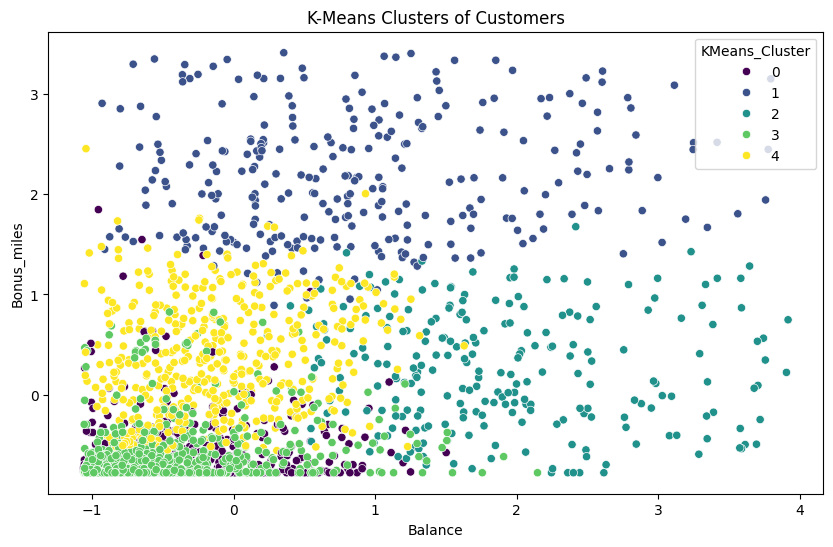

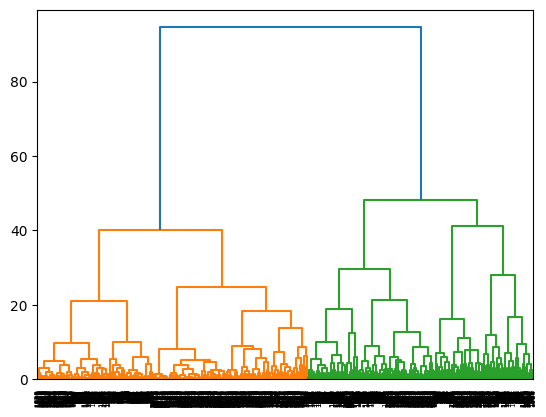

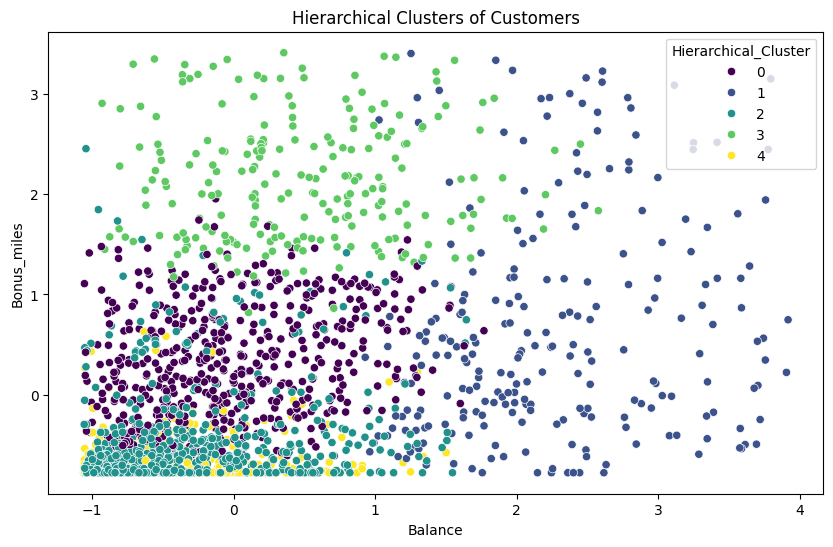

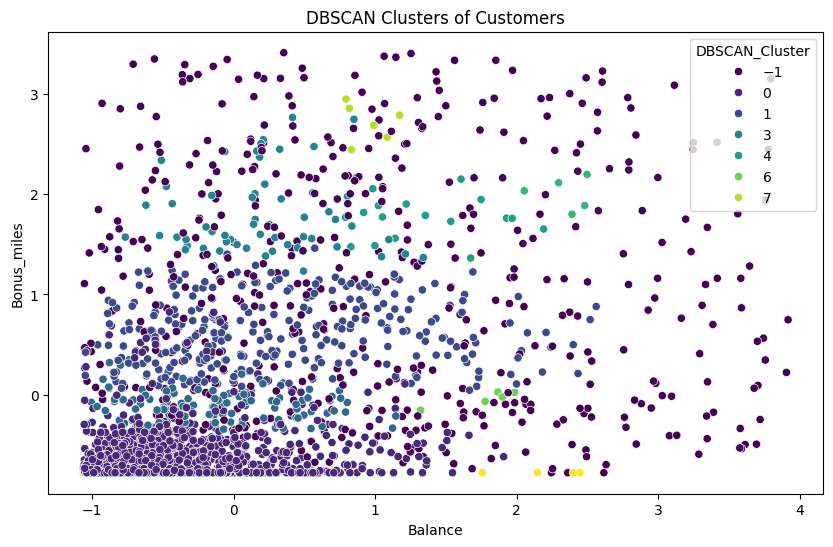

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,1,-0.371301,0.0,-0.692374,0.0,0.0,-0.765878,-1.050138,0.0,0.0,1.506923,0,0,4,0
1,2,-0.589938,0.0,-0.692374,0.0,0.0,-0.762583,-0.915131,0.0,0.0,1.491411,0,0,4,0
2,3,-0.046724,0.0,-0.692374,0.0,0.0,-0.448572,-0.645116,0.0,0.0,1.523404,0,0,4,0
3,4,-0.699711,0.0,-0.692374,0.0,0.0,-0.739683,-1.050138,0.0,0.0,1.483655,0,0,4,0
5,6,-0.659320,0.0,-0.692374,0.0,0.0,-0.779859,-1.185145,0.0,0.0,1.478807,0,0,4,0


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Analyze the clusters
kmeans_clusters = df.groupby('KMeans_Cluster').mean()
hierarchical_clusters = df.groupby('Hierarchical_Cluster').mean()
dbscan_clusters = df.groupby('DBSCAN_Cluster').mean()

# Print the cluster analysis
print('K-Means Clusters:')
display(kmeans_clusters)
print('Hierarchical Clusters:')
display(hierarchical_clusters)
print('DBSCAN Clusters:')
display(dbscan_clusters)

# Visualize the clusters for K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clusters of Customers')
plt.show()

# Visualize the clusters for Hierarchical Clustering
linkage_data = linkage(df[columns_to_check], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='Hierarchical_Cluster', palette='viridis')
plt.title('Hierarchical Clusters of Customers')
plt.show()

# Visualize the clusters for DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Balance', y='Bonus_miles', hue='DBSCAN_Cluster', palette='viridis')
plt.title('DBSCAN Clusters of Customers')
plt.show()

# Display the first few rows of the dataframe with all cluster labels
display(df.head())

# We can get the following insights from the above analysis:

For Kmeans :-

Cluster 0 : Customers with moderate balance and bonus miles, low flight miles in the last 12 months.(Similar to Cluster 0 in Heirarchial and Cluster 0 in DBSCAN)

Cluster 1 : Customers with high balance and bonus miles, moderate flight miles in the last 12 months.(Similar to Cluster 1 in Heirarchial and Cluster 1 in DBSCAN)

Cluster 2 : Customers with low balance and bonus miles, very low flight miles in the last 12 months.(Similar to Cluster 2 in Heirarchial and Cluster 2 in DBSCAN)

Cluster 3 : Customers with very high balance and bonus miles, high flight miles in the last 12 months.(Similar to Cluster 3 in Heirarchial and Cluster 3 in DBSCAN)

Cluster 4 : Customers with low balance and bonus miles, low flight miles in the last 12 months.(Similar to Cluster 4 in Heirarchial)

For DBSCAN :-

Cluster -1 : Noise points, customers that do not fit well into any cluster.